In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
n = 10000
X = np.linspace(-5, 5, num=n)
y = 5 * np.cos(2*X) +  10+5* np.random.normal(size=n)

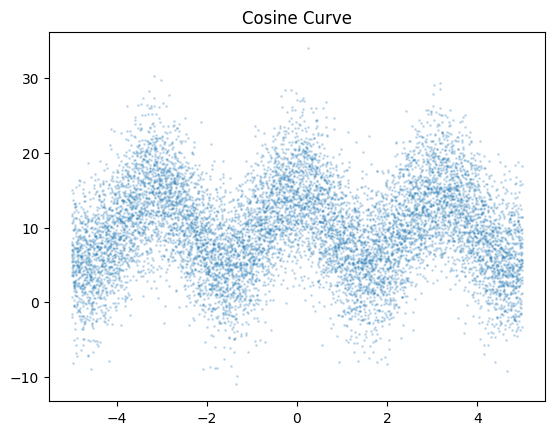

In [ ]:
plt.scatter(X, y,s=1,alpha=0.2) 
# title for the sine curve
plt.title('Cosine Curve')
plt.show()

In [ ]:
X_train= X.reshape(-1, 1)
y_1 = y.reshape(-1, 1)

# Cross-Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn import preprocessing as pre

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [ ]:
training_error=[]
cross_validation_error=[]
bias_b=[]
var_v=[]

In [ ]:
#from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [ ]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
y_test[:,0].shape

(2000,)

In [ ]:
y_test.size

2000

In [ ]:
X_train[:,0]

array([ 2.97079708,  1.22562256,  0.67156716, ..., -0.01150115,
        0.80958096,  4.48594859])

In [ ]:
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold

In [ ]:
X.shape

(10000,)

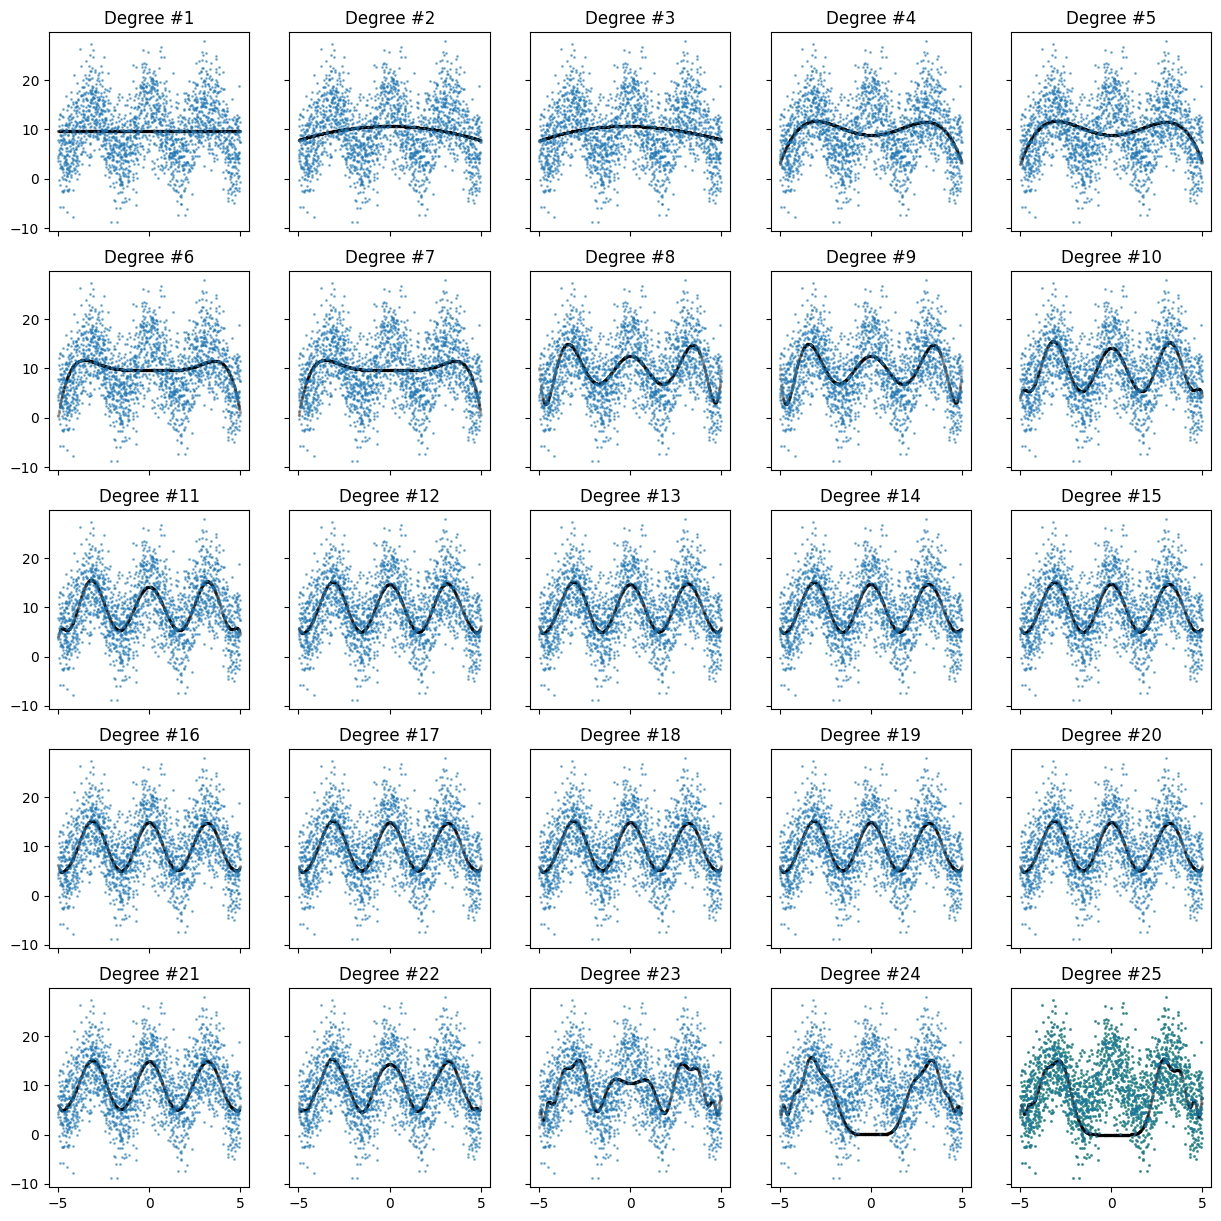

In [ ]:
maxdegree=25 # The maximum degree we would like to test
figure, axis = plt.subplots(5, 5,sharex=True,sharey=True,figsize=(15, 15))
plt.scatter(X_test,y_test,color='g',s=1,alpha=0.5)
training_error=[]
bias_b=[]
var_v=[]
cross_validation_error=[]
k=0
for i in range(5):
  for j in range(5):
    k=k+1
    x_poly_train=PolynomialFeatures(degree=k).fit_transform(X_train)
    x_poly_test=PolynomialFeatures(degree=k).fit_transform(X_test)
    lr=LinearRegression(fit_intercept=False)
    model=lr.fit(x_poly_train,y_train)
    y_pred=model.predict(x_poly_test)
    mse_train=mean_squared_error(y_test,y_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=10,return_train_score=False) #returns json of train error, test error
    training_error.append(mse_train)
    
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    #avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(lr, x_poly_train, y_train, x_poly_test, y_test, loss='0-1_loss',random_seed=123)
    var=np.var(y_pred)
    mse = np.mean((y_pred-y_test)**2) 
    var_v.append(var)
    bias = mse - var
    bias_b.append(bias)
    axis[i,j].scatter(X_test,y_pred,color='k',alpha=0.1,s=2)
    axis[i,j].scatter(X_test,y_test,color='#1f77b4',s=1,alpha=0.5)
    axis[i,j].title.set_text("Degree #{}".format(k))

In [ ]:
 cross_validation_error

[37.48838945571331,
 36.78949633567258,
 36.79471991894992,
 34.207716988860014,
 34.214068974084526,
 33.62772843658661,
 33.63567712533575,
 27.274808420489858,
 27.27955563754951,
 25.141339109823118,
 25.147610606984482,
 24.947863105926327,
 24.952821482389083,
 24.95073688828282,
 24.963036271191363,
 24.961775296882003,
 24.963580812037044,
 24.966595684211846,
 24.973547047572502,
 24.97707810293692,
 25.0139251881046,
 25.032120121412003,
 28.962689632217252,
 58.28389613094599,
 60.806725193342174]

Text(0.5, 1.0, 'Cross Validation Error VS Degree')

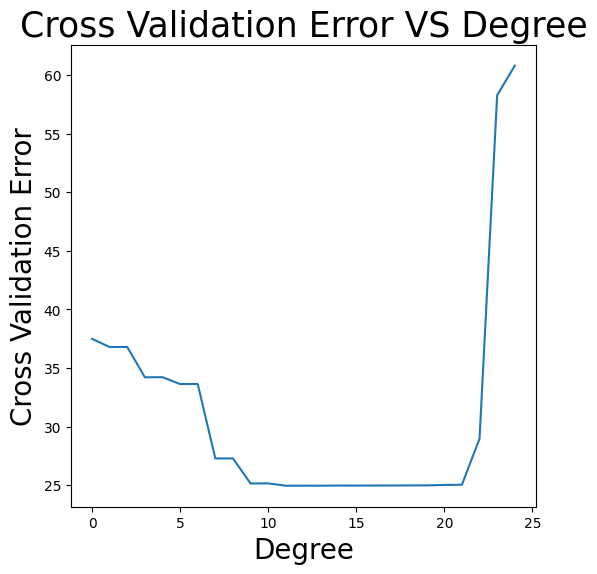

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('Cross Validation Error',fontsize=20)
ax.set_title('Cross Validation Error VS Degree',fontsize=25)

Text(0.5, 1.0, 'Mean Square Error VS Degree')

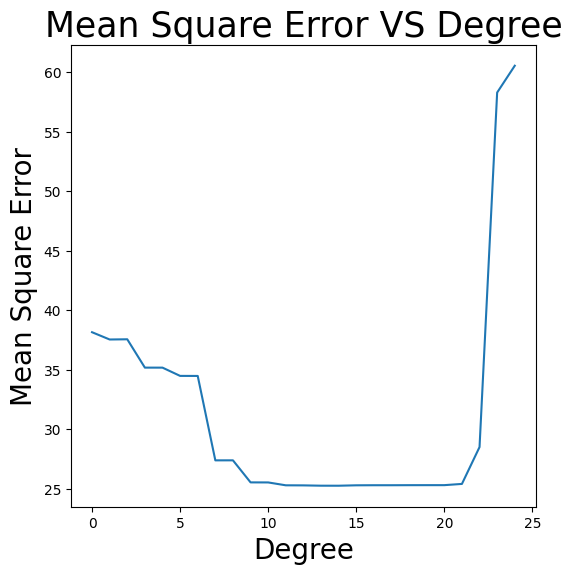

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(maxdegree),training_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('Mean Square Error',fontsize=20)
ax.set_title('Mean Square Error VS Degree',fontsize=25)

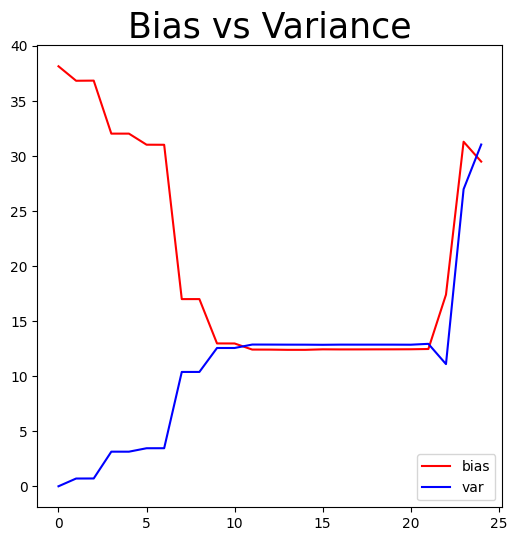

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(maxdegree),bias_b, color = 'r', label = "bias")
ax.plot(range(maxdegree),var_v,color = 'b', label = "var")
ax.set_title('Bias vs Variance',fontsize=25)
plt.legend(loc ="lower right");

In [ ]:
DF = pd.DataFrame(X,columns=['Input'])
DF['Output']=y

In [ ]:
DF

,Input,Output
0,-5.000,6.228130
1,-4.999,3.642117
2,-4.998,5.400266
3,-4.997,10.568240
4,-4.996,11.742598
...,...,...
9995,4.996,9.207556
9996,4.997,-3.240835
9997,4.998,9.863904
9998,4.999,2.632390


In [ ]:
import random
import pandas as pd

# Subsample sizes
subsample_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

bias_b=[]
var_v=[]
training_error=[]
cross_validation_error=[]
# DF.columns = DF.columns.astype(str)
# DF.rename(columns = {'0':'ZERO'}, inplace = True)
   
X=DF.Input
y=DF.Output

for subsample_size in subsample_sizes:
    #Randomly select subsample_size elements from the original dataset
    subsample = DF.sample(subsample_size)
    
    b=0
    v=0
    m=0
    for _ in range(10):     #for 10 fold CV
    # Split the subsample into test and training datasets
          train, test = train_test_split(subsample, test_size=0.1, shuffle=True)

          x_poly_train=PolynomialFeatures(degree=10).fit_transform(pd.DataFrame(train['Input']))
        
          x_poly_test=PolynomialFeatures(degree=10).fit_transform(pd.DataFrame(test['Input']))

          lr=LinearRegression(fit_intercept=False)

          model=lr.fit(x_poly_train,train["Output"])
          y_pred=model.predict(x_poly_test)

          var=np.var(y_pred)
          v=v+var

          mse = mean_squared_error(test['Output'],y_pred)
          m=m+mse

          bias = mse - var
          b=b+bias

    mse_train=m/10
    var=v/10
    training_error.append(mse_train)
    var_v.append(var)
    bias=b/10
    bias_b.append(bias)

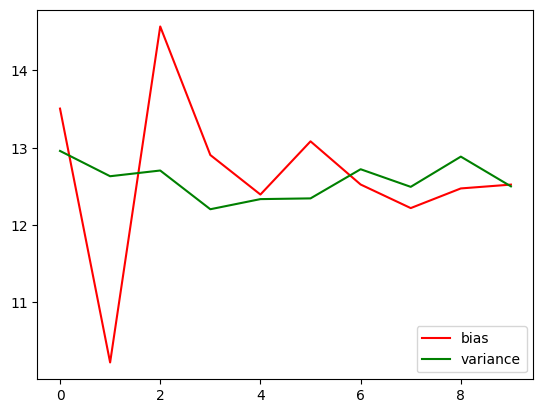

In [ ]:
plt.plot(bias_b,color = 'r', label = "bias")
plt.plot(var_v, color = 'g',label="variance")
#plt.plot(training_error)
plt.legend(loc ="lower right");

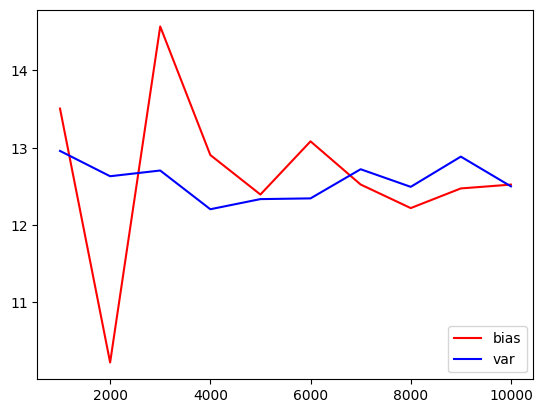

In [ ]:
plt.plot(subsample_sizes,bias_b, color = 'r', label = "bias")
plt.plot(subsample_sizes,var_v, color = 'b', label = "var")
plt.legend(loc ="lower right");

In [ ]:
bias_b,var_v

([13.506394676728704,
  10.222838000960863,
  14.568565388241291,
  12.90622737849643,
  12.395037666432685,
  13.082951381354684,
  12.524709584563606,
  12.219680895763343,
  12.473906074282059,
  12.523398941476248],
 [12.958973863553505,
  12.631661542986773,
  12.705585237544344,
  12.204820772776149,
  12.335821885790484,
  12.345111676397313,
  12.722209175243389,
  12.494395811713918,
  12.88535637465246,
  12.500713571971362])